In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

## Widget libraries
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Do not print out warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime
from datetime import datetime, date

from scipy import stats
import pycountry

Data from: https://ourworldindata.org/coronavirus-data
Ethnicity data from: http://data.un.org/Data.aspx?d=POP&f=tableCode:26

For regression approach: https://towardsdatascience.com/machine-learning-with-python-regression-complete-tutorial-47268e546cea


In [2]:
fn = 'data/owid-covid-data.csv'
df = pd.read_csv(fn)
df.head()

iso_code location        date  total_cases  new_cases  total_deaths  \
0      ABW    Aruba  2020-03-13            2          2             0   
1      ABW    Aruba  2020-03-20            4          2             0   
2      ABW    Aruba  2020-03-24           12          8             0   
3      ABW    Aruba  2020-03-25           17          5             0   
4      ABW    Aruba  2020-03-26           19          2             0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0           0                   18.733                 18.733   
1           0                   37.465                 18.733   
2           0                  112.395                 74.930   
3           0                  159.227                 46.831   
4           0                  177.959                 18.733   

   total_deaths_per_million           ...            aged_65_older  \
0                       0.0           ...                   13.085   
1                       0.0           ...                   13.085   
2                       0.0           ...                   13.085   
3                       0.0           ...                   13.085   
4                       0.0           ...                   13.085   

   aged_70_older  gdp_per_capita  extreme_poverty  cvd_death_rate  \
0          7.452       35973.781              NaN             NaN   
1          7.452       35973.781              NaN             NaN   
2          7.452       35973.781              NaN             NaN   
3          7.452       35973.781              NaN             NaN   
4          7.452       35973.781              NaN             NaN   

   diabetes_prevalence  female_smokers male_smokers  handwashing_facilities  \
0                11.62             NaN          NaN                     NaN   
1                11.62             NaN          NaN                     NaN   
2                11.62             NaN          NaN                     NaN   
3                11.62             NaN          NaN                     NaN   
4                11.62             NaN          NaN                     NaN   

   hospital_beds_per_100k  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 32 columns]

In [3]:
## See: http://data.un.org/Data.aspx?d=POP&f=tableCode:26
fn = 'data/CountryEthnicity.csv'
ce = pd.read_csv(fn)
ce.head()
len(ce['National and/or ethnic group'].unique())
#country_ethnicity

1437

In [4]:


country_summary = df.pivot_table(index='location', 
                         aggfunc={'total_cases': ['max'],
                                 'total_deaths': ['max'],
                                 'aged_65_older': ['mean'],
                                 'aged_70_older': ['mean'],
                                 'diabetes_prevalence': ['mean'],
                                 'gdp_per_capita': ['mean'],
                                 'median_age': ['mean']})

country_summary.columns = ['aged_65p', 'aged_70p', 'diabetes', 'gdp', 'median_age', 'total_cases', 'total_deaths']
country_summary['cfr'] = country_summary['total_deaths']/country_summary['total_cases']
country_summary = country_summary.dropna()
#stats.spearmanr(country_summary['aged_70p'], country_summary['cfr'])
#stats.spearmanr(country_summary['aged_65p'], country_summary['cfr'])
#stats.spearmanr(country_summary['median_age'], country_summary['cfr'])
country_summary = country_summary.reset_index()
country_summary.head()


location  aged_65p  aged_70p  diabetes        gdp  median_age  \
0          Afghanistan     2.581     1.337      9.59   1803.987        18.6   
1              Albania    13.188     8.643     10.08  11803.431        38.0   
2              Algeria     6.211     3.857      6.73  13913.839        29.1   
3               Angola     2.405     1.362      3.94   5819.495        16.8   
4  Antigua and Barbuda     6.933     4.631     13.17  21490.943        32.1   

   total_cases  total_deaths       cfr  
0         9998           216  0.021604  
1          989            31  0.031345  
2         8113           592  0.072969  
3           60             3  0.050000  
4           25             3  0.120000

In [5]:


fields = ['median_age', 'aged_65p', 'aged_70p', 'diabetes']
field = fields[0]

for field in fields:
    hist_data = [country_summary[field]]
    group_labels = [field] # name of the dataset

    data = ff.create_distplot(hist_data, group_labels)

    layout = dict(
        title='Field: ' + field

    )
    
    fig = go.Figure(data=data, layout=layout)
    fn = 'figures/' + field + '_' + 'Distribution.png'
    
    fig.write_image(fn)
    print('Written: {}'.format(fn))
    fig.show()
    


Written: figures/median_age_Distribution.png


Written: figures/aged_65p_Distribution.png


Written: figures/aged_70p_Distribution.png


Written: figures/diabetes_Distribution.png


In [6]:
country_summary['aged_65p_decile'] = pd.qcut(country_summary['aged_65p'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
country_summary['aged_70p_decile'] = pd.qcut(country_summary['aged_70p'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

country_summary['median_age_decile'] = pd.qcut(country_summary['median_age'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
country_summary['gdp_decile'] = pd.qcut(country_summary['gdp'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
country_summary['diabetes_decile'] = pd.qcut(country_summary['diabetes'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

country_summary.head()


location  aged_65p  aged_70p  diabetes        gdp  median_age  \
0          Afghanistan     2.581     1.337      9.59   1803.987        18.6   
1              Albania    13.188     8.643     10.08  11803.431        38.0   
2              Algeria     6.211     3.857      6.73  13913.839        29.1   
3               Angola     2.405     1.362      3.94   5819.495        16.8   
4  Antigua and Barbuda     6.933     4.631     13.17  21490.943        32.1   

   total_cases  total_deaths       cfr   aged_65p_decile aged_70p_decile  \
0         9998           216  0.021604    (1.143, 2.779]  (0.525, 1.535]   
1          989            31  0.031345  (11.225, 14.976]   (7.03, 9.796]   
2         8113           592  0.072969    (4.677, 6.293]  (2.888, 3.857]   
3           60             3  0.050000    (1.143, 2.779]  (0.525, 1.535]   
4           25             3  0.120000    (6.293, 8.062]   (3.857, 5.06]   

  median_age_decile              gdp_decile  diabetes_decile  
0    (15.099, 18.7]    (1699.865, 3302.484]  (9.126, 10.608]  
1    (37.08, 39.86]   (8279.922, 12294.876]  (9.126, 10.608]  
2     (27.56, 29.6]  (12294.876, 16330.318]    (6.168, 7.11]  
3    (15.099, 18.7]    (5637.177, 8279.922]   (3.064, 4.524]  
4      (29.6, 32.4]  (16330.318, 23203.967]  (12.758, 22.02]

In [7]:
fields = ['aged_70p_decile', 'aged_65p_decile', 'median_age_decile', 'gdp_decile', 'diabetes_decile']
field = fields[0]

for field in fields:

    quantiles = country_summary[field].unique().sort_values()
    fig = go.Figure()
    for quantile in quantiles:
        q = country_summary.loc[country_summary[field]==quantile]
        fig.add_trace(go.Box(y=q['cfr'], name=str(quantile), text=q['location'], boxpoints='all'))
    
    fig.layout = dict(
        title=field
    )

    #fig.show()

In [205]:

#fig = go.Figure(data=go.Scatter(x=country_summary['aged_70p'], y=country_summary['cfr'], mode='markers', text=country_summary['location']))
#fig = go.Figure(data=go.Scatter(x=country_summary['aged_65p'], y=country_summary['cfr'], mode='markers', text=country_summary['location']))

#fig.show()

In [8]:
import pycountry_convert as pc
def formatcountries(df=country_summary, countryfield='location'):
    countries = df[countryfield]
    for country in countries:
        
        c = pycountry.countries.get(name=country)
        
        if(c==None):
            
            df.loc[df[countryfield]==country, 'country'] = 'UNKNOWN'
            df.loc[df[countryfield]==country, 'continent'] = 'UNKNOWN'
            
        else:                        
            df.loc[df[countryfield]==country, 'country'] = c.alpha_3
            ca2 = c.alpha_2
#            print(pc.country_alpha2_to_continent_code(ca2))
            df.loc[df[countryfield]==country, 'continent'] = pc.country_alpha2_to_continent_code(ca2)
            
            
    return df

country_summary=formatcountries(country_summary)



In [9]:
# Make dummy variables from continent
continents = pd.get_dummies(country_summary['continent'])

country_summary = pd.concat([country_summary, continents], axis=1)
country_summary.head()

location  aged_65p  aged_70p  diabetes        gdp  median_age  \
0          Afghanistan     2.581     1.337      9.59   1803.987        18.6   
1              Albania    13.188     8.643     10.08  11803.431        38.0   
2              Algeria     6.211     3.857      6.73  13913.839        29.1   
3               Angola     2.405     1.362      3.94   5819.495        16.8   
4  Antigua and Barbuda     6.933     4.631     13.17  21490.943        32.1   

   total_cases  total_deaths       cfr   aged_65p_decile   ...     \
0         9998           216  0.021604    (1.143, 2.779]   ...      
1          989            31  0.031345  (11.225, 14.976]   ...      
2         8113           592  0.072969    (4.677, 6.293]   ...      
3           60             3  0.050000    (1.143, 2.779]   ...      
4           25             3  0.120000    (6.293, 8.062]   ...      

   diabetes_decile country continent AF AS EU  NA  OC  SA  UNKNOWN  
0  (9.126, 10.608]     AFG        AS  0  1  0   0   0   0        0  
1  (9.126, 10.608]     ALB        EU  0  0  1   0   0   0        0  
2    (6.168, 7.11]     DZA        AF  1  0  0   0   0   0        0  
3   (3.064, 4.524]     AGO        AF  1  0  0   0   0   0        0  
4  (12.758, 22.02]     ATG        NA  0  0  0   1   0   0        0  

[5 rows x 23 columns]

In [208]:


data = [dict(type='choropleth',
    locations = country_summary['country'],
    z = country_summary['cfr'],
    text = country_summary['aged_70p'],
    colorscale = 'Blues',
    autocolorscale=False)]
layout = dict(
    title='CFR',
    geo = dict(
        showframe=False,
        showcoastlines=False,
    ),
)

#activitymap = go.FigureWidget(data = data,layout=layout)
#fig = go.Figure(data = data,layout=layout)
#fig.show()

In [10]:
continents = country_summary['continent'].unique()
fig = go.Figure()
for continent in continents:
    c = country_summary.loc[country_summary['continent']==continent]
    fig.add_trace(go.Box(y=c['cfr'], name=str(continent), text=c['location'], boxpoints='all'))
    
fig.layout = dict(
    title='cfr'
)

fig.show()


In [209]:
country_summary['log_median_age'] = np.log(country_summary['median_age'])
country_summary['log_aged65p'] = np.log(country_summary['aged_65p'])
country_summary['log_aged70p'] = np.log(country_summary['aged_70p'])
country_summary['log_diabetes'] = np.log(country_summary['diabetes'])
country_summary['log_gdp'] = np.log(country_summary['gdp'])
country_summary.head()

location  aged_65p  aged_70p  diabetes        gdp  median_age  \
0          Afghanistan     2.581     1.337      9.59   1803.987        18.6   
1              Albania    13.188     8.643     10.08  11803.431        38.0   
2              Algeria     6.211     3.857      6.73  13913.839        29.1   
3               Angola     2.405     1.362      3.94   5819.495        16.8   
4  Antigua and Barbuda     6.933     4.631     13.17  21490.943        32.1   

   total_cases  total_deaths       cfr   aged_65p_decile    ...    EU NA OC  \
0         9998           216  0.021604    (1.143, 2.779]    ...     0  0  0   
1          989            31  0.031345  (11.225, 14.976]    ...     1  0  0   
2         8113           592  0.072969    (4.677, 6.293]    ...     0  0  0   
3           60             3  0.050000    (1.143, 2.779]    ...     0  0  0   
4           25             3  0.120000    (6.293, 8.062]    ...     0  1  0   

  SA UNKNOWN log_median_age  log_aged65p  log_aged70p  log_diabetes   log_gdp  
0  0       0       2.923162     0.948177     0.290428      2.260721  7.497754  
1  0       0       3.637586     2.579307     2.156750      2.310553  9.376146  
2  0       0       3.370738     1.826322     1.349890      1.906575  9.540639  
3  0       0       2.821379     0.877550     0.308954      1.371181  8.668969  
4  0       0       3.468856     1.936293     1.532773      2.577942  9.975387  

[5 rows x 28 columns]

In [210]:
#sel_columns = ['median_age', 'aged_70p', 'aged_65p', 'diabetes', 'gdp', 'cfr', 'log_median_age', 'log_aged70p', 'log_aged65p', 'log_diabetes', 'log_gdp']
sel_columns = ['median_age', 'aged_70p', 'aged_65p', 'diabetes', 'gdp', 'cfr', 'EU', 'NA', 'AS', 'AF', 'SA', 'OC']
selected = country_summary[sel_columns]
corr_matrix = selected.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

#corr_matrix = dtf_train.corr(method="spearman")
#sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
#plt.title("spearman correlation")

Text(0.5, 1.0, 'pearson correlation')

In [325]:
# Use aged_65p, gdp and diabetes to predict cfr
from sklearn import model_selection, preprocessing, feature_selection, linear_model
sel_columns = ['median_age', 'aged_70p', 'aged_65p', 'diabetes', 'gdp', 'cfr']
#sel_columns = ['median_age', 'aged_70p', 'aged_65p', 'diabetes', 'gdp', 'cfr', 'EU', 'NA', 'AS', 'AF', 'SA', 'OC']
selected = country_summary[country_summary['total_cases']>1000]
selected = selected[sel_columns]



## split data
dtf_train, dtf_test = model_selection.train_test_split(selected, 
                      test_size=0.3)
print("X_train shape:", dtf_train.drop("cfr",axis=1).shape, "| X_test shape:", dtf_test.drop("cfr",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["cfr"]),2), "| y_test mean:", round(np.mean(dtf_test["cfr"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("cfr",axis=1).columns)

## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("cfr", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("cfr", 
                        axis=1).columns, index=dtf_train.index)## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled['cfr'] = scalerY.fit_transform(
                    dtf_train['cfr'].values.reshape(-1,1))
dtf_scaled.head()




X_train shape: (72, 5) | X_test shape: (32, 5)
y_train mean: 0.04 | y_test mean: 0.04
6 features: Index(['median_age', 'aged_70p', 'aged_65p', 'diabetes', 'gdp'], dtype='object')


median_age  aged_70p  aged_65p      diabetes       gdp       cfr
9      0.804270  0.959082  0.797016 -2.121424e-01  0.972935  0.089135
71     0.733096  0.755842  0.749925  1.228193e-01  0.239787  2.027714
138   -1.024911 -0.411756 -0.423146 -1.309142e+00 -0.715276 -0.490234
23     0.028470 -0.037391 -0.005425  2.791347e-01 -0.258200  0.609525
154   -0.697509 -0.370581 -0.388638 -1.983371e-15 -0.698524 -0.373291

Text(0.5, 1.0, 'pearson correlation')

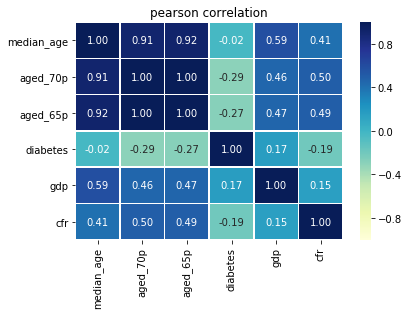

In [326]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

#corr_matrix = dtf_train.corr(method="spearman")
#sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
#plt.title("spearman correlation")

In [327]:
X = dtf_train.drop("cfr", axis=1).values
y = dtf_train["cfr"].values
feature_names = dtf_train.drop("cfr", axis=1).columns## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k='all').fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=0.0, fit_intercept=True), 
                                 max_features=4).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

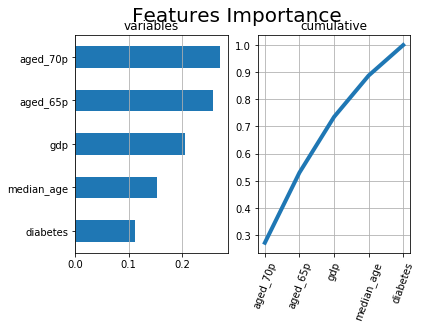

In [328]:
from sklearn import ensemble
X = dtf_train.drop("cfr", axis=1).values
y = dtf_train["cfr"].values
feature_names = dtf_train.drop("cfr", axis=1).columns.tolist()## call model
model = ensemble.GradientBoostingRegressor()## Importance
model.fit(X,y)
importances = model.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [351]:
from sklearn import metrics
#X_names = ['median_age'] ## Bad
#X_names = ['aged_70p'] 
#X_names = ['aged_65p']
#X_names = ['aged_65p', "gdp"]
#X_names = ['aged_70p', "gdp"]
#X_names = ['median_age', "gdp"] ## Bad
#X_names = ['aged_65p', "diabetes"]
#X_names = ['gdp', "diabetes", "aged_65p"] ## Best
#X_names = ['gdp', "diabetes", "aged_70p"]
#X_names = ['gdp', "diabetes", "aged_65p", "NA", 'AS']


X_train = dtf_train[X_names].values
y_train = dtf_train["cfr"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["cfr"].values

model = linear_model.LinearRegression()
#model = linear_model.Ridge(alpha=0.9)
#model = linear_model.ElasticNet(alpha=0.01)
#model = ensemble.GradientBoostingRegressor()
#model = ensemble.RandomForestRegressor()

models = {
    'linear_regression': linear_model.LinearRegression(),
    'gradient_boosting': ensemble.GradientBoostingRegressor(),
    'random_forest': ensemble.RandomForestRegressor()
}
evaluation_metrics = {}
for m in models.keys():
    model = models[m]
    evaluation_metrics[m] = {'r2': [],'mape': [], 'mae': [], 'rmse': [], 'max_error': []}
    cv = model_selection.KFold(n_splits=5, shuffle=True)
    
    for train, test in cv.split(X_train, y_train):
        prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
        true = y_train[test]
        r2 = metrics.r2_score(true, prediction)
        mape = np.mean(np.abs((y_test-predicted)/predicted))
        mae = metrics.mean_absolute_error(y_test, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
        residuals = y_test - predicted
        max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
        max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
        max_true, max_pred = y_test[max_idx], predicted[max_idx]
        
        evaluation_metrics[m]['r2'].append(r2)
        evaluation_metrics[m]['mape'].append(mape)
        evaluation_metrics[m]['mae'].append(mae)
        evaluation_metrics[m]['rmse'].append(rmse)
        evaluation_metrics[m]['max_error'].append(max_error)
        
    
    print(m)
    print("R2 (explained variance):", round(np.mean(evaluation_metrics[m]['r2']), 2))
    print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(evaluation_metrics[m]['mape']), 2))
    print("Mean Absolute Error (Σ|y-pred|/n):", "{}".format(np.mean(evaluation_metrics[m]['mae'])))
    print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{}".format(np.mean(evaluation_metrics[m]['rmse'])))## residuals
    print("Max Error:", "{}".format(np.mean(evaluation_metrics[m]['max_error'])))
    print('\n')

    

linear_regression
R2 (explained variance): 0.01
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.49
Mean Absolute Error (Σ|y-pred|/n): 0.018790346701487947
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.026684790481849907
Max Error: 0.09880887722666978


gradient_boosting
R2 (explained variance): -0.3
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.49
Mean Absolute Error (Σ|y-pred|/n): 0.018790346701487947
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.026684790481849907
Max Error: 0.09880887722666978


random_forest
R2 (explained variance): 0.01
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.49
Mean Absolute Error (Σ|y-pred|/n): 0.018790346701487947
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.026684790481849907
Max Error: 0.09880887722666978




In [335]:
#X_names = ['median_age'] ## Bad
#X_names = ['aged_70p'] 
#X_names = ['aged_65p']
#X_names = ['aged_65p', "gdp"]
#X_names = ['aged_70p', "gdp"]
#X_names = ['median_age', "gdp"] ## Bad
#X_names = ['aged_65p', "diabetes"]
X_names = ['gdp', "diabetes", "aged_65p"] ## Best
#X_names = ['gdp', "diabetes", "aged_70p"]
#X_names = ['gdp', "diabetes", "aged_65p", "NA", 'AS']


model = linear_model.LinearRegression()
#model = linear_model.Ridge(alpha=0.9)
#model = linear_model.ElasticNet(alpha=0.01)
#model = ensemble.GradientBoostingRegressor()
#model = ensemble.RandomForestRegressor()


for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

## train
model.fit(X_train, y_train)## test
predicted = model.predict(X_test)

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{}".format(max_error))

R2 (explained variance): 0.23
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.49
Mean Absolute Error (Σ|y-pred|/n): 0.018790346701487947
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.026684790481849907
Max Error: 0.09880887722666978


In [318]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

In [300]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

In [301]:
print("True:", "{}".format(y_test[1]), "--> Pred:", "{}".format(predicted[1]))

True: 0.0062047569803516025 --> Pred: 0.0239615027742369


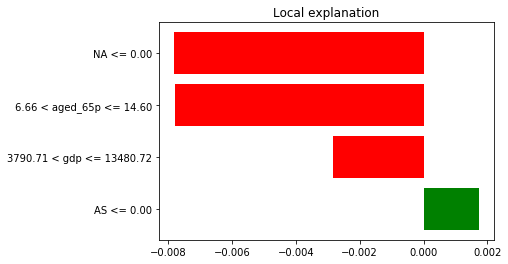

In [302]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train, feature_names=X_names, class_names="Y", mode="regression")
explained = explainer.explain_instance(X_test[2], model.predict, num_features=4)
explained.as_pyplot_figure()

array([0.19565488, 0.        , 0.00496073, 0.00620476, 0.01636364,
       0.02879581, 0.06336536, 0.02777778, 0.0046849 , 0.09090909,
       0.03924162, 0.04413732, 0.01176075, 0.06552052, 0.04      ,
       0.065251  , 0.03458777, 0.01150527, 0.0167166 , 0.04648678,
       0.02970297, 0.        , 0.05897114, 0.02160432, 0.00884956,
       0.        , 0.02826889, 0.        , 0.02985075, 0.05      ,
       0.04096774, 0.02932478, 0.005386  , 0.01221834, 0.00830565,
       0.00540186, 0.0070922 , 0.        , 0.04024256, 0.01842105,
       0.        , 0.01724814, 0.04194631, 0.03175704, 0.04      ,
       0.05232558, 0.04057481, 0.16259461, 0.01833873, 0.01861702,
       0.01600557, 0.04125737, 0.00422352])

In [311]:
country_summary.sort_values(by=['cfr']).tail(20)

location  aged_65p  aged_70p  diabetes        gdp  median_age  \
30                Canada    16.984    10.797      7.37  44017.591        41.4   
14              Barbados    14.952     9.473     13.57  16978.068        39.8   
68                Guyana     5.305     2.837     11.62   7435.047        26.3   
48               Ecuador     7.104     4.458      5.55  10581.936        28.1   
150             Suriname     6.933     4.229     12.54  13767.119        29.6   
33                  Chad     2.486     1.446      6.10   1768.153        16.7   
91               Liberia     3.057     1.756      2.42    752.788        19.2   
104               Mexico     6.857     4.321     13.06  17336.469        29.3   
11               Bahamas     8.996     5.200     13.17  27717.847        34.3   
17                Belize     3.853     2.279     17.11   7824.362        25.0   
4    Antigua and Barbuda     6.933     4.631     13.17  21490.943        32.1   
152               Sweden    19.985    13.433      4.79  46949.283        41.0   
147                Spain    19.436    13.799      7.17  34272.360        45.5   
113          Netherlands    18.779    11.881      5.29  48472.545        43.2   
71               Hungary    18.577    11.976      7.55  26777.561        43.4   
79                 Italy    23.021    16.240      4.78  35220.084        47.9   
165       United Kingdom    18.517    12.527      4.28  39753.244        40.8   
16               Belgium    18.571    12.849      4.29  42658.576        41.8   
172                Yemen     2.922     1.583      5.35   1479.147        20.3   
57                France    19.718    13.079      4.77  38605.671        42.0   

     total_cases  total_deaths       cfr   aged_65p_decile    ...     EU NA  \
30         83610          6355  0.076008  (14.976, 19.017]    ...      0  1   
14            92             7  0.076087  (11.225, 14.976]    ...      0  1   
68           127            10  0.078740    (4.677, 6.293]    ...      0  0   
48         36258          3096  0.085388    (6.293, 8.062]    ...      0  0   
150           11             1  0.090909    (6.293, 8.062]    ...      0  0   
33           648            60  0.092593    (1.143, 2.779]    ...      0  0   
91           255            26  0.101961    (2.779, 3.137]    ...      0  0   
104        65856          7179  0.109011    (6.293, 8.062]    ...      0  1   
11           100            11  0.110000   (8.062, 11.225]    ...      0  1   
17            18             2  0.111111    (3.808, 4.677]    ...      0  1   
4             25             3  0.120000    (6.293, 8.062]    ...      0  1   
152        33188          3992  0.120284  (19.017, 27.049]    ...      1  0   
147       235290         28678  0.121884  (19.017, 27.049]    ...      1  0   
113        45064          5811  0.128950  (14.976, 19.017]    ...      1  0   
71          3741           486  0.129912  (14.976, 19.017]    ...      1  0   
79        229327         32735  0.142744  (19.017, 27.049]    ...      1  0   
165       254195         36393  0.143170  (14.976, 19.017]    ...      1  0   
16         56810          9237  0.162595  (14.976, 19.017]    ...      1  0   
172          212            39  0.183962    (2.779, 3.137]    ...      0  0   
57        144806         28332  0.195655  (19.017, 27.049]    ...      1  0   

    OC SA UNKNOWN log_median_age  log_aged65p  log_aged70p  log_diabetes  \
30   0  0       0       3.723281     2.832272     2.379268      1.997418   
14   0  0       0       3.683867     2.704845     2.248446      2.607861   
68   0  1       0       3.269569     1.668650     1.042747      2.452728   
48   0  1       0       3.335770     1.960658     1.494700      1.713798   
150  0  1       0       3.387774     1.936293     1.441966      2.528924   
33   0  0       0       2.815409     0.910675     0.368801      1.808289   
91   0  0       0       2.954910     1.117434     0.563038      0.883768   
104  0  0       0       3.377588     1.925270 